X1 ~ R(-5, 5)
X2 ~ R(-5, 5)
X3 ~ N(-5, 3)


In [2]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой
import seaborn

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

from statsmodels.stats.weightstats import ztest as ztest

plt.style.use('ggplot')    # стиль графиков

%matplotlib inline

In [13]:
np.random.seed(228)
X1 = np.random.uniform(-5, 5, 200)
# np.random.seed(228)
X2 = np.random.uniform(-5, 5, 100)
# np.random.seed(111)
X3 = np.random.normal(-5, 3, 200)
m_x1 = 0
m_x2 = 0
m_x3 = -5
var_x1 = 100/12
var_x2 = 100/12
var_x3 = 9
n1 = 200
n2 = 100
n3 = 200

In [14]:
m1 = np.mean(X1)
v1 = np.var(X1, ddof = 1)
s1 = np.std(X1, ddof = 1)
m1, v1, s1

(-0.1679435800452309, 8.962469404929797, 2.993738366145211)

In [15]:
m2 = np.mean(X2)
v2 = np.var(X2, ddof = 1)
s2 = np.std(X2, ddof = 1)
m2, v2, s2

(0.16959422263302953, 7.929483715937103, 2.815933897650494)

In [16]:
m3 = np.mean(X3)
v3 = np.var(X3, ddof = 1)
s3 = np.std(X3, ddof = 1)
m3, v3, s3

(-4.769033597241876, 9.310820530511638, 3.0513637165227676)

In [17]:
mean_pol = (n1 * m1 + n2 * m2 + n3 * m3)/(n1 + n2 + n3)
var_pol = ((n1 - 1) * v1 + (n2 - 1) * v2 + (n3 - 1) * v3) / (n1 + n2 + n3 - 3) #вопрос
std_pol = var_pol**(1/2)
n_pol = n1 + n2 + n3
print("Pooled for X1, X2, X3: mean_pol = %.3f; var_pol = %.3f; std_pol = %.3f; n_pol = %.3f" % (mean_pol, var_pol, std_pol, n_pol))

Pooled for X1, X2, X3: mean_pol = -1.941; var_pol = 8.896; std_pol = 2.983; n_pol = 500.000


In [18]:
args = (X1, X2, X3)
X4 = np.concatenate(args)
m4 = np.mean(X4)
v4 = np.var(X4, ddof=1)
s4 = np.std(X4, ddof=1)
m4, v4, s4

(-1.9408720263882369, 14.218767521437911, 3.770778105568917)

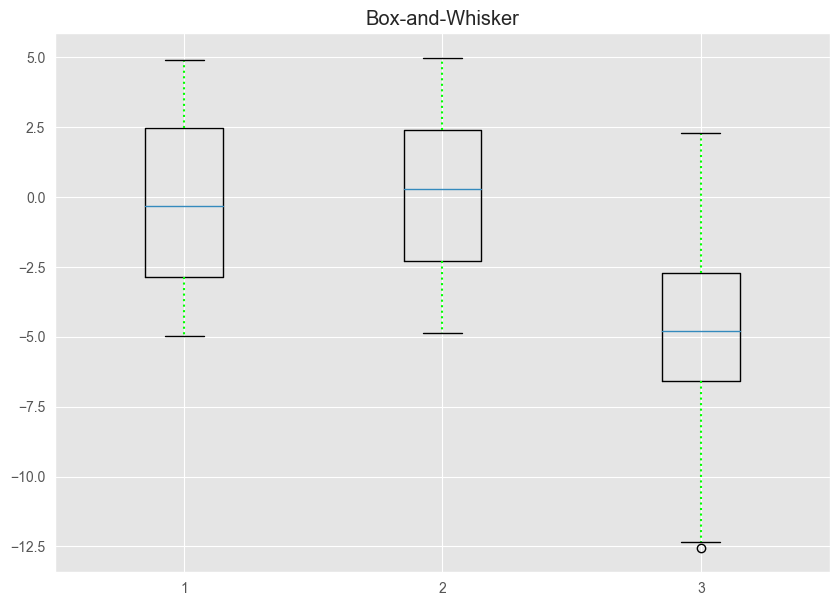

In [19]:
#plt.boxplot(sample1)
data = [X1, X2, X3]

fig = plt.figure(figsize =(10, 7))
bp = plt.boxplot(data)
for whisker in bp['whiskers']:
    whisker.set(color ='lime',
                linewidth = 1.5,
                linestyle =":")
# plt.boxplot(data,patch_artist = True,
#                 notch ='True', vert = 0)

plt.title("Box-and-Whisker")
# plt.legend(labels=['X1', 'X2', 'X3'])

plt.show()

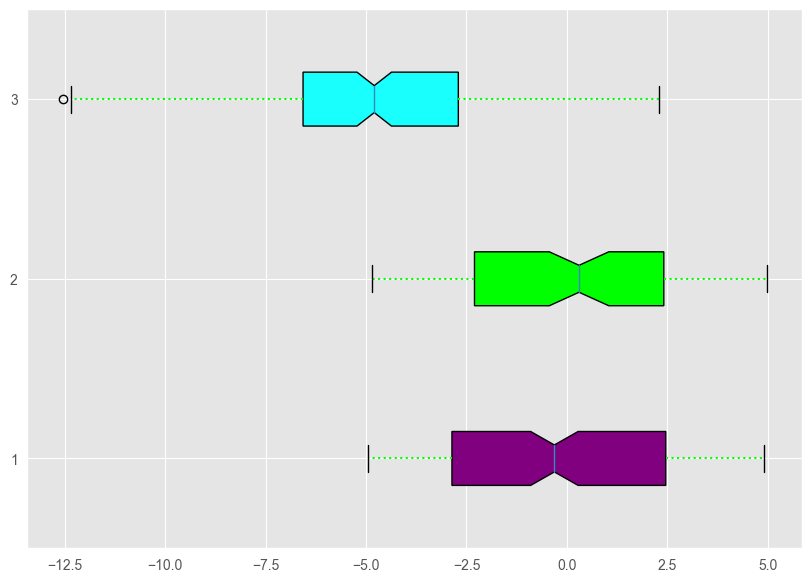

In [20]:
data = [X1, X2, X3]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['purple', 'lime',
          '#18FFFD']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='lime',
                linewidth = 1.5,
                linestyle =":")

In [21]:
stats.bartlett(X1, X2, X3)

BartlettResult(statistic=0.8432245934949416, pvalue=0.6559883189026199)

In [22]:
stats.f_oneway(X1, X2, X3)

F_onewayResult(statistic=150.27574324565376, pvalue=9.068145696844869e-52)

In [115]:
K = 3
n = n1 + n2 + n3
mean = (sum(X1) + sum(X2) + sum(X3))/n

#общая дисперсия
s = 0
for ar in data:
  for x in ar:
    s += (x - mean)**2
D_x = s/n

#внутригрупповая дисперсиея
s = 0
for ar in data:
  s = s + len(ar) * np.var(ar)
D_w = s/n

#межгрупповая дисперсия
s = 0
for ar in data:
  s = s + len(ar) * (np.mean(ar) - mean)**2
D_b = s/n

print("D_b = %.3f" % D_b)
print("D_w = %.3f" % D_w)
print("D_x = %.3f" % D_x)

print('Несмещенная оценка групировочного признака: {z:.3f}'.format(z = (D_b * n)/(K - 1)))
print('Несмещенная оценка остаточного признака: {z:.3f}'.format(z = (D_w * n)/(n - K)))
print('Несмещенная оценка всех признаков: {z:.3f}'.format(z = (D_x * n)/(n - 1)))


D_b = 6.185
D_w = 8.190
D_x = 14.375
Несмещенная оценка групировочного признака: 1546.256
Несмещенная оценка остаточного признака: 8.239
Несмещенная оценка всех признаков: 14.404


### $\bar{D}_{межгр.}$
### $\bar{D}_{внутр.}$
### $\bar{D}_{общ.}$

In [89]:
eta_squared = D_b / D_x   #эмпирический коэффициент детерминации
eta = eta_squared ** (1/2)   #эмпирическое корреляционное отношение

print("эмпирический коэффициент детерминации: %.3f" % eta_squared)
print("эмпирическое корреляционное отношение: %.3f" % eta)

эмпирический коэффициент детерминации: 0.430
эмпирическое корреляционное отношение: 0.656


In [90]:
m1, m2, m3

(0.20187272245140064, -0.08493763703980088, -4.965735050567193)

In [91]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
f_oneway(X1, X2, X3)

df = pd.DataFrame({'score': np.concatenate((X1, X3, X2)),
                   'group': np.concatenate((np.repeat(['data_1', 'data_3'], repeats=200) ,np.repeat(['data_2'], repeats=100)))})

tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
data_1 data_2  -0.2868 0.6934 -1.1132  0.5396  False
data_1 data_3  -5.1676    0.0 -5.8424 -4.4928   True
data_2 data_3  -4.8808    0.0 -5.7072 -4.0544   True
----------------------------------------------------


In [92]:
alpha = 0.05

c12 = m1 - m2
c13 = m1 - m3
c23 = m2 - m3
var12 = (n * D_w) * (1/n1 + 1/n2) / (n - K)
var13 = (n * D_w) * (1/n1 + 1/n3) / (n - K)
var23 = (n * D_w) * (1/n2 + 1/n3) / (n - K)

quantile_f = stats.f(K-1,n-K).ppf(1 - alpha)

c12_lower = c12 - (var12 * (K-1) * quantile_f)**(1/2)
c13_lower = c13 - (var13 * (K-1) * quantile_f)**(1/2)
c23_lower = c23 - (var23 * (K-1) * quantile_f)**(1/2)

c12_upper = c12 + (var12 * (K-1) * quantile_f)**(1/2)
c13_upper = c13 + (var13 * (K-1) * quantile_f)**(1/2)
c23_upper = c23 + (var23 * (K-1) * quantile_f)**(1/2)

C:\Users\Artemii\AppData\Local\Temp\ipykernel_8684\2115772720.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color=colors[i])


([<matplotlib.axis.YTick at 0x1638ced3910>,
 [Text(0, 0, 'C12'), Text(0, 1, 'C13'), Text(0, 2, 'C23')])

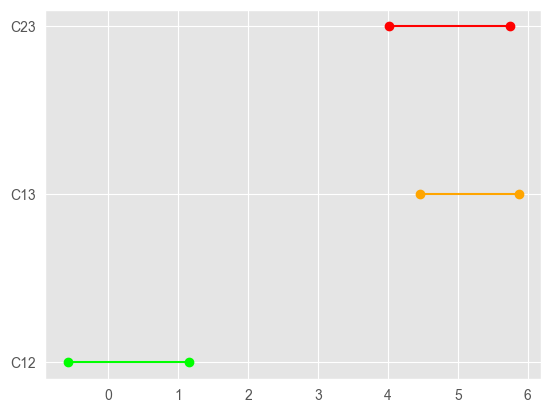

In [93]:
data_dict = {}
data_dict['category'] = ['C12','C13','C23']
data_dict['lower'] = [c12_lower, c13_lower, c23_lower]
data_dict['upper'] = [c12_upper, c13_upper, c23_upper]
dataset = pd.DataFrame(data_dict)
colors = ['lime', 'orange', 'red']
i = 0
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color=colors[i])
    i += 1
plt.yticks(range(len(dataset)),list(dataset['category']))